# Romain's Notebook - Section 1

## Libraries Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

In [71]:
import openbabel
import pybel
from collections import Counter

## Data Loading

In [3]:
df_train = pd.read_csv("Data/train")
df_test = pd.read_csv("Data/test")

In [4]:
## Temporary shrinking the training and testing set to be able to quickly work :
df_train = df_train.head(100000)
df_test = df_test.head(100000)

## Feature Design

##### Usage of the package : OpenBabel

In [95]:
mols = df_train.loc[0:1, 'smiles'].values

# Read a Molecule
a = pybel.readstring("smi",mols[0])
b = pybel.readstring("smi",mols[1])

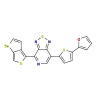

In [96]:
a

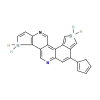

In [97]:
b

In [99]:
print('Molecule : '), a
print('Weight :'), a.molwt
print('FingerPrint:'), a.calcfp().bits[0:10]
print('Atomic Structure:'), Counter([t.type for t in a.atoms])
print('Energy'), a.energy
print('Dim'), a.dim
print('Spin'), a.spin

print('tanimoto A|B'), a.calcfp()|b.calcfp()

 Molecule :  c1ccc(o1)c1ccc(s1)c1cnc(c2scc3[se]ccc23)c2nsnc12	

Weight : 470.44926
FingerPrint: [6, 11, 14, 17, 23, 24, 25, 35, 38, 39]
Atomic Structure: Counter({'Car': 19, 'Nar': 3, 'S2': 3, 'O2': 1, 'Se': 1})
Energy 0.0
Dim 0
Spin 1
tanimoto 0.209944751381


In [86]:
test = a.conformers

In [93]:
a.spin

1

## RF Test

In [ ]:
#store gap values
Y_train = df_train.gap.values
#row where testing examples start
test_idx = df_train.shape[0]
#delete 'Id' column
df_test = df_test.drop(['Id'], axis=1)
#delete 'gap' column
df_train = df_train.drop(['gap'], axis=1)

In [ ]:
#DataFrame with all train and test examples so we can more easily apply feature engineering on
df_all = pd.concat((df_train, df_test), axis=0)
df_all.head()

#Drop the 'smiles' column
df_all = df_all.drop(['smiles'], axis=1)
vals = df_all.values
X_train = vals[:test_idx]
X_test = vals[test_idx:]
print "Train features:", X_train.shape
print "Train gap:", Y_train.shape
print "Test features:", X_test.shape

LR = LinearRegression()
LR.fit(X_train, Y_train)
LR_pred = LR.predict(X_test)

print('INSAMPLE RMSE'),
print mean_squared_error(LR.predict(X_train), Y_train)

## Various Links

http://stats.stackexchange.com/questions/56010/predicting-chemical-property-boiling-point-from-a-smiles-string

http://openbabel.org/docs/dev/Features/Fingerprints.html

http://openbabel.org/wiki/Tutorial:Fingerprints

https://pypi.python.org/pypi/openbabel

https://openbabel.org/docs/dev/UseTheLibrary/Python_Pybel.html

/usr/local/Cellar/open-babel/2.3.2



## Command Lines

brew install open-babel

pip install openbabel

In [ ]:
import openbabel

In [ ]:
import pybel
smiles = ['CCCC', 'CCCN']
mols = [pybel.readstring("smi", x) for x in smiles] # Create a list of two molecules
fps = [x.calcfp() for x in mols] # Calculate their fingerprints
print fps[0].bits, fps[1].bits
print fps[0] | fps[1] # Print the Tanimoto coefficient

class pybel.Molecule(OBMol)
Represent a Pybel Molecule.

Required parameter:
OBMol – an Open Babel OBMol or any type of Cinfony Molecule
Attributes:
atoms, charge, conformers, data, dim, energy, exactmass, formula, molwt, spin, sssr, title, unitcell.
Methods:
addh(), calcfp(), calcdesc(), draw(), localopt(), make3D(), removeh(), write()
The underlying Open Babel OBMol can be accessed using the attribute: